# Profits Predictions for RAQIB Tech Inc.

### Importing Libraries

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math
import warnings
import xgboost as xgb
import seaborn as sns
from __future__ import division
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import catboost as cb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
np.set_printoptions(precision=2)

### Loading the Dataset

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\__PYTHON__\Datasets\Machine Learning Full\Linear Regression\1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [4]:
data.shape

(1000, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [6]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
data['State'].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [8]:
state_map = {'New York': 0, 'California': 1, 'Florida': 2}

data['State'] = data['State'].map(state_map)

### Finding Correlations between features

In [10]:
features = data.iloc[:, :4].columns.tolist()
target = data.iloc[:, 4].name
print('features =', features)
print('target =', target)

features = ['R&D Spend', 'Administration', 'Marketing Spend', 'State']
target = Profit


In [11]:
correlations =  {}
for f in features:
    data_temp = data[[f, target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [12]:
data_corr = pd.DataFrame(correlations, index=['Value']).T
data_corr.loc[data_corr['Value'].abs().sort_values(ascending=False).index]

,Value
R&D Spend vs Profit,0.945245
Marketing Spend vs Profit,0.917270
Administration vs Profit,0.741560
State vs Profit,0.016969


<AxesSubplot:>

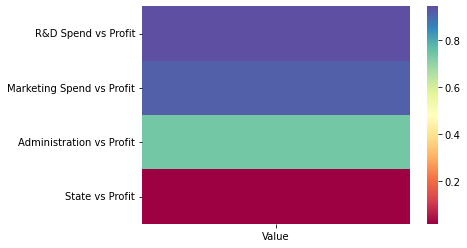

In [22]:
sns.heatmap(data=data_corr.loc[data_corr['Value'].abs().sort_values(ascending=False).index], cmap='Spectral')

In [13]:
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.582434,0.978407,0.026450,0.945245
Administration,0.582434,1.000000,0.520465,0.000870,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.034363,0.917270
State,0.026450,0.000870,0.034363,1.000000,0.016969
Profit,0.945245,0.741560,0.917270,0.016969,1.000000


### Model Training

In [24]:
X = data.iloc[:, :4]
y = data.iloc[:, 4]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 4) (800,)
(200, 4) (200,)


In [28]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=150, max_depth=5, colsample_bytree=1, eta=0.5)

In [29]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.5, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [30]:
preds = xg_reg.predict(X_test)

### Model Performance Evaluation

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

rmsle = np.log(np.sqrt(mean_squared_error(y_test, preds)))
print("RMSLE: %f" % (rmsle))

RMSE: 2268.239402
RMSLE: 7.726759


In [33]:
from sklearn.metrics import r2_score

print('R Squared Score: {:.5f}'.format(r2_score(y_test, preds)))

R Squared Score: 0.99662


In [35]:
# The first 10 predictions by the model

print('First 10 predictions of the model on test data:\n', preds[:10])

First 10 predictions of the model on test data:
 [178898.11 121609.8  123367.49 129829.68 176034.9  172892.23  60176.43
  65077.42 151658.42  77150.95]


In [42]:
print('First 10 values of test data:\n', y_test[:10].values)

First 10 values of test data:
 [178847.6  121482.79 123485.25 129889.87 175906.27 172769.32  60368.49
  64997.04 151891.29  77242.45]


In [282]:
xg_reg.predict(X_test[:5])

array([178898.11, 121609.8 , 123367.49, 129829.68, 176034.9 ],
      dtype=float32)

In [283]:
y_test[:5]

array([178847.6 , 121482.79, 123485.25, 129889.87, 175906.27])

In [75]:
xg_regr = xgb.XGBRegressor(objective ='reg:squarederror', alpha= 25, eta= 0.7, max_depth= 4, 
                           n_estimators= 170, n_jobs=-1, base_score=1e-3, reg_alpha=50, subsample=0.9)

In [77]:
xg_regr.fit(X_train, y_train)

XGBRegressor(alpha=25, base_score=0.001, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.7, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.699999988,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=170, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=50, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred = xg_regr.predict(X_test)

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

rmsle = np.log(np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSLE: %f" % (rmsle))

RMSE: 1423.439077
RMSLE: 7.260831


In [93]:
J_mse = np.sum((y_pred - y_test)**2)/ X_test.shape[0]
np.sqrt(J_mse)

1423.4390768112532

In [94]:
print(xg_regr.score(X_test, y_test)*100)
print(xg_regr.score(X_train, y_train)*100)

99.86686184294898
99.99983464434192


In [90]:
from sklearn.metrics import r2_score

print('R Squared Score: {}'.format(r2_score(y_test, y_pred)))

R Squared Score: 0.9986686184294898


In [89]:
sse = np.sum((y_pred - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

R square obtain for normal equation method is : 0.9986686184294898


In [84]:
# The first 10 predictions by the model

print('First 10 predictions of the model on test data:\n', y_pred[:10])

First 10 predictions of the model on test data:
 [178812.19 121107.32 123578.88 129652.12 175892.39 172887.78  60250.8
  65142.46 151928.7   77159.84]


In [86]:
print('First 10 values of test data:\n', y_test[:10].values)

First 10 values of test data:
 [178847.6  121482.79 123485.25 129889.87 175906.27 172769.32  60368.49
  64997.04 151891.29  77242.45]


### Checking for Multicollinearity

Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when two or more independent variables are too highly correlated to each other. It makes it hard to interpret the model and also creates an overfitting problem. The variance inflation factor, VIF identifies correlation between independent variables and strength of that correlation.

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [102]:
calc_vif(X)

,variables,VIF
0,R&D Spend,72.303108
1,Administration,17.124589
2,Marketing Spend,129.135841
3,State,2.476758


In [105]:
X_ = data.drop(['R&D Spend', 'Profit'], axis=1)
calc_vif(X_)

,variables,VIF
0,Administration,10.330301
1,Marketing Spend,8.887476
2,State,2.450933


In [129]:
# data2 = data.copy()
# data2['New Feature'] = data.apply(lambda x: x['Marketing Spend'] - x['R&D Spend'], axis=1)
# X1 = data2.drop(['Marketing Spend', 'R&D Spend', 'Profit'], axis=1)
# calc_vif(X1)

### Checking for Linearity, Residual normality and mean

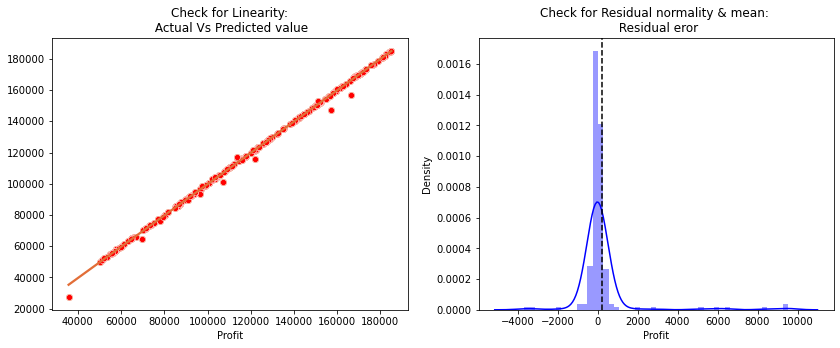

In [130]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.regplot(y_test, y_pred, color='#E26E38', marker='o')
sns.scatterplot(y_test, y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## `Question`

For the month of July, the following data for RAQIB Tech Inc. was generated:

R&D Spend = $300,344.5

Administration = $700,203

Marketing = $240,555.6

Branch Location = New York

Use your model to predict the profit for the month

In [131]:
given = np.array([[300344.5, 700203, 240555.6, 0]])
pred_given = xg_regr.predict(given)
print('The profit for July of RAQIB Tech Inc. is predicted to be {} dollars.'.format(pred_given))

The profit for July of RAQIB Tech Inc. is predicted to be [350151.38] dollars.
